# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
df = df[vars].dropna()

In [2]:
df.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


In [3]:
df.describe()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
count,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000,5102.000000
mean,125.626813,49.455116,1.517444,3.024108,3.438456,29.506978,1.588789
std,18.486560,17.682020,0.499745,1.283866,1.305679,6.977889,0.569994
min,82.000000,20.000000,1.000000,1.000000,1.000000,14.500000,1.000000
25%,112.500000,34.000000,1.000000,2.000000,3.000000,24.600000,1.000000
50%,124.000000,49.000000,2.000000,3.000000,4.000000,28.500000,2.000000
75%,136.000000,64.000000,2.000000,4.000000,4.000000,33.200000,2.000000
max,236.000000,80.000000,2.000000,5.000000,9.000000,64.600000,9.000000


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [4]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0991
Time:                        19:30:20   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

According to the fitted model, there is a positive coefficient (0.0091) on the age variable, indicating that for every one year increase in age, there is an expected increase of 0.0091 in BMI. However, the p-value for the coefficient is 0.099, which is greater than the typical significance level of 0.05. This suggests that we cannot reject the null hypothesis that the true coefficient is zero, meaning there may not be a significant linear relationship between age and BMI. Therefore, we cannot definitively say whether older people tend to have higher or lower BMI than younger people based on this model.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

The analysis suggests that there is a weak positive relationship between BMI and age. However, the R-squared value is very low, indicating that only a very small proportion of the variation in BMI can be explained by age alone. Additionally, the p-value for the slope coefficient is close to 0.1, which is larger than the conventional threshold of 0.05 for statistical significance. Therefore, we cannot be very confident that there is a relationship between BMI and age in the population that NHANES represents based on this analysis alone.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

Based on the regression model, the expected change in BMI associated with a 20-year increase in age is 0.0091 * 20 = 0.182. Therefore, on average, the BMI of a 40-year-old would be expected to be 0.182 units higher than the BMI of a 20-year-old. However, note that the regression model has a very low R-squared value, indicating that it does not explain much of the variability in BMI, so this estimate should be interpreted with caution.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

The R-squared value is 0.001, which means that age explains only 0.1% of the variation in BMI in this population.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [5]:
df.RIDRETH1.unique()

array([3, 4, 1, 5, 2], dtype=int64)

In [6]:
# changing labels for Gender and Ethnicity columns
df['RIAGENDRx'] = df['RIAGENDR'].replace({1: "Male", 2: "Female"})
df['RIDRETH1x'] = df['RIDRETH1'].replace({1: 'Mexican American',
                                          2: 'Other Hispanic',
                                          3: 'Non-Hispanic White',
                                          4: 'Non-Hispanic Black',
                                          5: 'Other Race - Including Multi-Racial'
                                          })

In [7]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     49.27
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           3.98e-59
Time:                        19:30:21   Log-Likelihood:                -17007.
No. Observations:                5102   AIC:                         3.403e+04
Df Residuals:                    5095   BIC:                         3.407e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.2361      0.355     87.891      0.000      30.539      31.933
RIAGENDRx[T.Male]                                   -1.0226      0.190     -5.370      0.000      -1.396      -0.649
RIDRETH1x[T.Non-Hispanic Black]                     -0.4499      0.308     -1.460      0.144      -1.054       0.154
RIDRETH1x[T.Non-Hispanic White]                     -1.8555      0.282     -6.588      0.000      -2.408      -1.303
RIDRETH1x[T.Other Hispanic]                         -0.9379      0.345     -2.721      0.007      -1.614      -0.262
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.7799      0.334    -14.318      0.000      -5.434      -4.125
RIDAGEYR                                             0.0065      0.005      1.196      0.232      -0.004       0.017
==============================================================================
Omnibus:                      917.090   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1855.286
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.026   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value for this model is 0.055, meaning that about 5.5% of the variation in BMI is explained by age, gender, and ethnicity.

The intercept value of 31.2361 represents the average BMI for a female Mexican American, which is the reference group. The coefficients for gender and ethnicity are negative, indicating that, on average, males and individuals from other ethnic groups have lower BMIs than female Mexican Americans.

Of the ethnic groups, non-Hispanic white individuals have the lowest average BMI, as shown by the coefficient of -1.8555. The coefficient for age is positive (0.0065), indicating that, on average, BMI increases with age. However, this coefficient is not statistically significant (p-value = 0.232), so we cannot be confident that age has a significant impact on BMI in this model.

Overall, the results suggest that gender and ethnicity are significant factors in explaining variation in BMI, but age may not be as important in this population.

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

Although the R-squared value of the model increased from 0.001 in the original model to 0.055 in the updated model with gender and ethnicity as additional control variables, the mean relationship between BMI and age reduced from 0.0091 to 0.0065 in this model. This means that the additional control variables explain some of the variance in BMI that was not accounted for by age alone.

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

When the additional covariates of gender and ethnicity were added to the model, the standard error increased by 0.001 units (0.005 to 0.006). This shows that the additional covariates didn't have a significant impact on the standard error for the regression parameter for age. 

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

Looking at the R-squared of the new model, which is 0.055, we can see that 5.4% of the variation in BMI isn't explained by Age alone.

__Q2d.__ What reference level did the software select for the ethnicity variable?

The reference level used is the Mexican American.

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

From the result, since the average difference in BMI between people of the same gender, ethicity with a unit difference in Age is 0.0065. If since the difference in age between the two non-Hispanic black men is 10yrs, that means the expected BMI difference is 0.065.

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [8]:
bmi_50_MexAmeri_Female = 31.2361 + 0.0065*50
bmi_50_nonHisBlack_Male = 31.2361 - 1.0226 - 0.4499 + 0.0065*50

print("BMI of a 50 year old Mexican American woman: {:.3f}".format(bmi_50_MexAmeri_Female))
print("BMI of a 50 year old non-Hispanic Black man: {:.3f}".format(bmi_50_nonHisBlack_Male))
print("Difference: {:.4f}".format(bmi_50_MexAmeri_Female-bmi_50_nonHisBlack_Male))

BMI of a 50 year old Mexican American woman: 31.561
BMI of a 50 year old non-Hispanic Black man: 30.089
Difference: 1.4725


## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [9]:
df_sample25 = df.sample(frac=0.5)

In [10]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=df_sample25)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     21.90
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           3.08e-25
Time:                        19:30:21   Log-Likelihood:                -8475.1
No. Observations:                2551   AIC:                         1.696e+04
Df Residuals:                    2544   BIC:                         1.701e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.0361      0.502     61.780      0.000      30.051      32.021
RIAGENDRx[T.Male]                                   -1.3070      0.266     -4.909      0.000      -1.829      -0.785
RIDRETH1x[T.Non-Hispanic Black]                     -0.3182      0.434     -0.734      0.463      -1.169       0.532
RIDRETH1x[T.Non-Hispanic White]                     -1.5666      0.399     -3.926      0.000      -2.349      -0.784
RIDRETH1x[T.Other Hispanic]                         -0.7217      0.484     -1.491      0.136      -1.671       0.228
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.3073      0.476     -9.051      0.000      -5.241      -3.374
RIDAGEYR                                             0.0077      0.008      1.014      0.311      -0.007       0.023
==============================================================================
Omnibus:                      471.532   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.556
Skew:                           1.084   Prob(JB):                    3.94e-212
Kurtosis:                       5.112   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

Comparing the estimated regression coefficients and their standard errors between the two models, we can see that the coefficients are quite similar between the two models. However, the standard errors are larger in the second model, likely due to the smaller sample size thereby indicating less certainty about the estimated coefficients.

There seems to be a systematic relationship between the two sets of results, as estimates are similar but with the larger standard errors in the second model. This is consistent with the idea that as sample size decreases, the precision of the estimated coefficients decreases, leading to larger standard errors.

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

In [11]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=df)
result = model.fit()

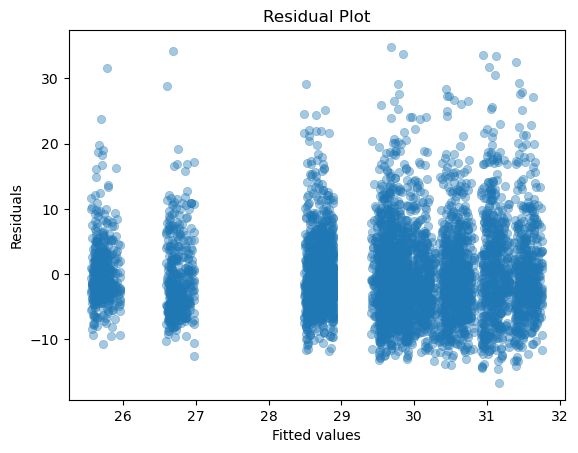

In [12]:
# get the predicted values and resiuals from the model
y_pred = result.fittedvalues
residuals = result.resid

# create the residual plot
sns.scatterplot(x=y_pred, y=residuals, edgecolor=None, alpha=0.4)
plt.title("Residual Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals");

__Q4a.__ What mean/variance relationship do you see?

The residual plot shows a constant variance in that the spread of the residuals is consistent across all values of the fitted values, indicating a homoscedasticity. Also the residuals have a zero mean which can be seen as the residuals are approximately centered around 0.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [13]:
df.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIAGENDRx', 'RIDRETH1x'],
      dtype='object')

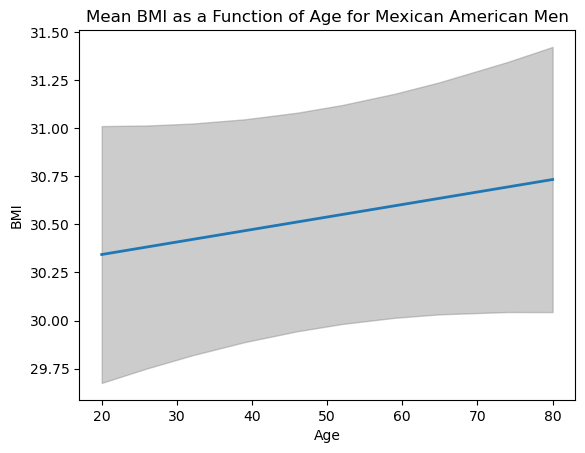

In [14]:
from statsmodels.sandbox.predict_functional import predict_functional

# fix variables apart from 'RIDAGEYR' at certain values. Not all of these
# variables are used here but we provide them with a value anyway to prevent
# a warning message from appearing.
values = {"RIAGENDRx":"Male", "RIDRETH1x":"Mexican American", "BPXSY1":1,
          "RIDRETH1":1, "SMQ020":1, "DMDEDUC2":1, "RIAGENDR":1}

# the returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR", values=values, ci_method="simultaneous")

ax = sns.lineplot(x=fv, y=pr, lw=2)
ax.fill_between(x=fv, y1=cb[:,0], y2=cb[:,1], color='grey', alpha=0.4)
ax.set_title("Mean BMI as a Function of Age for Mexican American Men")
ax.set_xlabel("Age")
ax.set_ylabel("BMI");

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

I don't get this question abeg 🤲🏽

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

Same goes for this one.

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

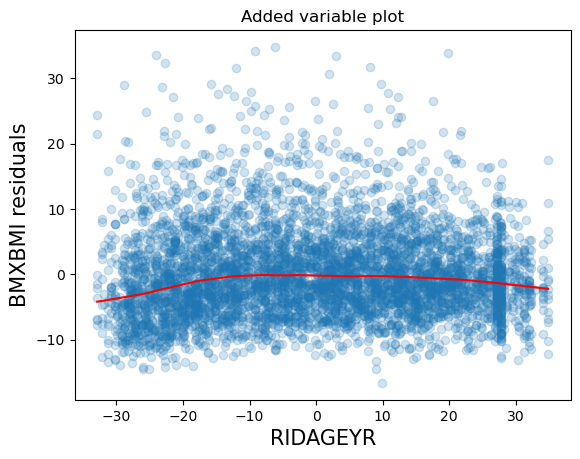

In [15]:
from statsmodels.graphics.regressionplots import add_lowess

# this is an equivalent way to fit a linear regression model, it needs to
# be done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=df)
result = model.fit()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [16]:
# enter your code here

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [17]:
# enter your code here

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [18]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [19]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?